In [46]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(64, 64, 1)):
    model = models.Sequential()
    
    # Define input layer
    model.add(layers.Input(shape=input_shape))

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    
    # Flatten and Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))

    # Reshape output to 64x64 dimensions
    model.add(layers.Dense(64*64, activation='relu'))
    model.add(layers.Reshape((64, 64, 1)))

    # Output layer (Sigmoid for binary mask)
    model.add(layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model()
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 1)      │            10 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,032,394 (80.23 MB)

 Trainable params: 21,032,394 (80.23 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
import numpy as np
import cv2
import random
from sklearn.model_selection import train_test_split

def draw_incomplete_shape(img_size=64):
    img = np.ones((img_size, img_size, 1), dtype=np.uint8) * 255  # White background
    shape_type = random.choice(['line', 'circle', 'ellipse', 'rectangle', 'polygon', 'star'])

    if shape_type == 'line':
        start = (random.randint(0, img_size//2), random.randint(0, img_size))
        end = (random.randint(img_size//2, img_size), random.randint(0, img_size))
        cv2.line(img, start, end, 0, 2)  # Black line
    
    elif shape_type == 'circle':
        center = (random.randint(img_size//4, 3*img_size//4), random.randint(img_size//4, 3*img_size//4))
        radius = random.randint(img_size//8, img_size//4)
        cv2.circle(img, center, radius, 0, 2)  # Black circle
    
    elif shape_type == 'ellipse':
        center = (random.randint(img_size//4, 3*img_size//4), random.randint(img_size//4, 3*img_size//4))
        axes = (random.randint(img_size//8, img_size//4), random.randint(img_size//8, img_size//4))
        angle = random.randint(0, 180)
        cv2.ellipse(img, center, axes, angle, 0, 360, 0, 2)  # Black ellipse
    
    elif shape_type == 'rectangle':
        top_left = (random.randint(0, img_size//2), random.randint(0, img_size//2))
        bottom_right = (random.randint(img_size//2, img_size), random.randint(img_size//2, img_size))
        cv2.rectangle(img, top_left, bottom_right, 0, 2)  # Black rectangle
    
    elif shape_type == 'polygon':
        num_sides = random.randint(3, 6)
        radius = random.randint(img_size//8, img_size//4)
        center = (random.randint(img_size//4, 3*img_size//4), random.randint(img_size//4, 3*img_size//4))
        points = []
        for i in range(num_sides):
            angle = 2 * np.pi * i / num_sides
            x = int(center[0] + radius * np.cos(angle))
            y = int(center[1] + radius * np.sin(angle))
            points.append([x, y])
        points = np.array(points)
        cv2.polylines(img, [points], isClosed=True, color=0, thickness=2)  # Black polygon
    
    elif shape_type == 'star':
        points = []
        center = (random.randint(img_size//4, 3*img_size//4), random.randint(img_size//4, 3*img_size//4))
        inner_radius = random.randint(img_size//8, img_size//4)
        outer_radius = random.randint(inner_radius, img_size//3)
        for i in range(10):
            angle = i * np.pi / 5
            r = outer_radius if i % 2 == 0 else inner_radius
            x = int(center[0] + r * np.cos(angle))
            y = int(center[1] + r * np.sin(angle))
            points.append([x, y])
        points = np.array(points)
        cv2.polylines(img, [points], isClosed=True, color=0, thickness=2)  # Black star

    return img

def generate_synthetic_data(num_samples=1000, img_size=64):
    X = []
    y = []
    for _ in range(num_samples):
        # Generate an incomplete shape
        img = draw_incomplete_shape(img_size)

        # Create an occluded version of the shape to simulate incompleteness
        mask = np.ones((img_size, img_size, 1), dtype=np.uint8) * 255  # White background
        occlusion = np.random.randint(0, 2)  # Randomly decide to occlude or not
        if occlusion:
            occlusion_size = random.randint(10, img_size // 2)
            x1 = random.randint(0, img_size - occlusion_size)
            y1 = random.randint(0, img_size - occlusion_size)
            x2 = x1 + occlusion_size
            y2 = y1 + occlusion_size
            mask[y1:y2, x1:x2] = 0  # Create an occlusion area
        
        incomplete_img = cv2.bitwise_and(img, mask)

        X.append(img)
        y.append(incomplete_img)

    X = np.array(X) / 255.0  # Normalize
    y = np.array(y) / 255.0  # Normalize

    return X, y

# Generate data
X, y = generate_synthetic_data(1000)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Build the model
model = build_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model in the native Keras format
model.save('shape_completion_model.keras')


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8903 - loss: 0.4300 - val_accuracy: 0.8775 - val_loss: 0.3451
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8942 - loss: 0.3205 - val_accuracy: 0.8775 - val_loss: 0.3579
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.8883 - loss: 0.3272 - val_accuracy: 0.8775 - val_loss: 0.3417
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.8894 - loss: 0.3211 - val_accuracy: 0.8775 - val_loss: 0.3425
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.8902 - loss: 0.3107 - val_accuracy: 0.8776 - val_loss: 0.3280
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.8938 - loss: 0.2892 - val_accuracy: 0.8777 - val_loss: 0.3236
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8902 - loss: 0.2790 - val_accuracy: 0.8777 - val_loss: 0.3349
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.8897 - loss: 0.2603 - val_accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8879 - loss: 0.8026
Validation Loss: 0.8243810534477234
Validation Accuracy: 0.883557140827179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


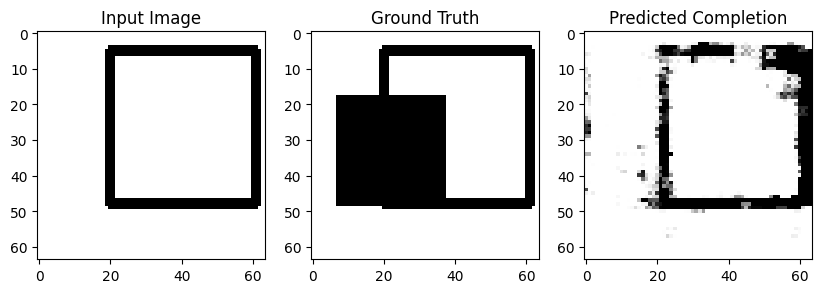

In [67]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Test the model on some validation examples
import matplotlib.pyplot as plt

# Choose a random sample from the validation set
sample_idx = random.randint(0, len(X_val)-1)
example_input = X_val[sample_idx].reshape(1, 64, 64, 1)
predicted_output = model.predict(example_input)

# Display the input and output
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_val[sample_idx].reshape(64, 64), cmap='gray')
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(y_val[sample_idx].reshape(64, 64), cmap='gray')
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(predicted_output.reshape(64, 64), cmap='gray')
plt.title("Predicted Completion")
plt.show()


# research paper

In [51]:
# Load your pre-trained model (replace with your model's path)
model = load_model('shape_completion_model.keras')

# Function to process image and detect open shapes
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours, edges

In [52]:
# Function to identify open shapes
def identify_open_shapes(contours, edges):
    open_shapes = []
    for contour in contours:
        # Approximate the contour
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, False)  # False means open shape
        # Check if the shape is open by checking endpoints
        if len(approx) > 2:
            open_shapes.append(approx)
    return open_shapes

# Function to predict and complete open shapes
def complete_open_shapes(image, open_shapes):
    completions = []
    for shape in open_shapes:
        # Extract bounding box of the shape
        x, y, w, h = cv2.boundingRect(shape)
        roi = image[y:y+h, x:x+w]
        
        # Check if roi has 3 channels
        if roi.ndim == 3 and roi.shape[2] == 3:
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi_resized = cv2.resize(roi_gray, (64, 64))  # Assuming model input is 64x64
            roi_resized = roi_resized[:, :, np.newaxis]  # Add channel dimension
        else:
            roi_resized = cv2.resize(roi, (64, 64))  # If already grayscale
        roi_resized = roi_resized / 255.0  # Normalize
        roi_resized = np.expand_dims(roi_resized, axis=0)
        
        # Predict the completion
        completion = model.predict(roi_resized)
        completion = completion.reshape(64, 64)
        completion = (completion * 255).astype(np.uint8)
        completion = cv2.resize(completion, (w, h))  # Resize back to original size
        
        # Create output by overlaying completion on original image
        if roi.ndim == 3 and roi.shape[2] == 3:
            completion_colored = cv2.cvtColor(completion, cv2.COLOR_GRAY2BGR)
            overlay = image.copy()
            overlay[y:y+h, x:x+w] = completion_colored
        else:
            overlay = image.copy()
            overlay[y:y+h, x:x+w] = np.stack([completion]*3, axis=-1)  # Convert grayscale to BGR

        completions.append(overlay)
    
    return completions

In [53]:
# Function to display suggestions
def display_suggestions(original_image, completions):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, len(completions) + 1, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    
    for i, completion in enumerate(completions):
        plt.subplot(1, len(completions) + 1, i + 2)
        plt.imshow(cv2.cvtColor(completion, cv2.COLOR_BGR2RGB))
        plt.title(f"Suggestion {i + 1}")
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


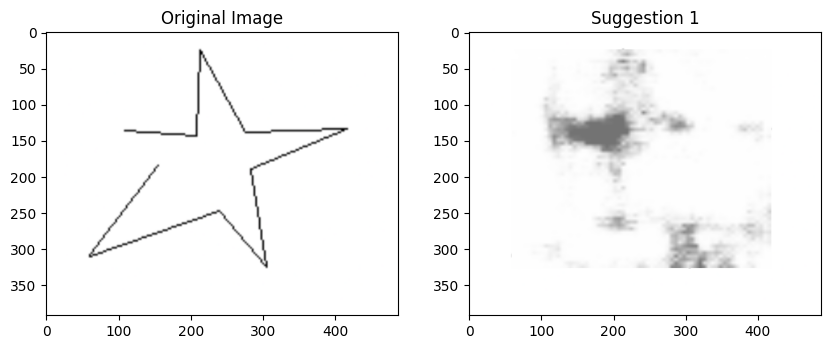

In [68]:
# Main Function to execute the logic
def main(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Preprocess and identify open shapes
    contours, edges = preprocess_image(image)
    open_shapes = identify_open_shapes(contours, edges)
    
    # Complete open shapes using the model
    completions = complete_open_shapes(image, open_shapes)
    
    # Display suggestions
    display_suggestions(image, completions)

# Example usage
if __name__ == "__main__":
    main('incomplete_star.png')